In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#속성명이 없는 데이터. numpy를 이용하여 읽어오기
traffic=np.loadtxt('data/Seoul_traffic_rate.csv',dtype=str, encoding='utf-8')
# 열 수가 행마다 일관되지 않아 읽어올 수 없다 (Null데이터가 존재하기 때문)

ValueError: the number of columns changed from 2 to 4 at row 49; use `usecols` to select a subset and avoid this error

In [29]:
traffic=pd.read_csv("data/Seoul_traffic_rate.csv",encoding="utf-8")
traffic.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17724\2903504576.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic=pd.read_csv("data/Seoul_traffic_rate.csv",encoding="utf-8")


,20150102,금,삼청터널,001,유입,성북동→삼청동,31,14,8,9,...,308,254,253,260,274,172,169,141,108,78
0,20150102,금,삼청터널,001,유출,삼청동→성북동,39.0,27.0,15.0,11.0,...,328.0,364.0,391.0,488.0,593.0,597.0,404.0,359.0,250.0,189.0
1,20150102,금,자하문터널,002,유입,세검정→효자동,166.0,112.0,55.0,46.0,...,890.0,895.0,832.0,810.0,741.0,587.0,523.0,542.0,564.0,521.0
2,20150102,금,자하문터널,002,유출,효자동→세검정,218.0,145.0,87.0,74.0,...,738.0,858.0,947.0,1104.0,1340.0,1279.0,943.0,877.0,848.0,663.0
3,20150102,금,사직터널,003,유입,독립문→사직공원,399.0,219.0,220.0,312.0,...,947.0,1294.0,957.0,925.0,1016.0,1225.0,699.0,746.0,656.0,703.0
4,20150102,금,사직터널,003,유출,사직공원→독립문,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 제대로 된 속성명 추가하기

In [30]:
# 원본 데이터 : 속성명이 제대로 지정되지 않음
traffic.columns

Index(['20150102', '금', '삼청터널', '001      ', '유입', '성북동→삼청동', '31', '14', '8',
       '9', '20', '54', '289', '825', '688', '522', '410', '327', '293', '266',
       '308', '254', '253', '260', '274', '172', '169', '141', '108', '78'],
      dtype='object')

In [31]:
# 제대로 된 속성명 지정해주기
traffic.columns = ['Date', 'Day', 'Place name', 'Place number','Separation',
              'Direction', '0시', '1시','2시','3시','4시','5시','6시','7시','8시',
                  '9시','10시','11시','12시','13시','14시','15시','16시','17시',
                   '18시','19시','20시','21시','22시','23시']
traffic.columns

Index(['Date', 'Day', 'Place name', 'Place number', 'Separation', 'Direction',
       '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시'],
      dtype='object')

In [32]:
traffic.head()

,Date,Day,Place name,Place number,Separation,Direction,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20150102,금,삼청터널,001,유출,삼청동→성북동,39.0,27.0,15.0,11.0,...,328.0,364.0,391.0,488.0,593.0,597.0,404.0,359.0,250.0,189.0
1,20150102,금,자하문터널,002,유입,세검정→효자동,166.0,112.0,55.0,46.0,...,890.0,895.0,832.0,810.0,741.0,587.0,523.0,542.0,564.0,521.0
2,20150102,금,자하문터널,002,유출,효자동→세검정,218.0,145.0,87.0,74.0,...,738.0,858.0,947.0,1104.0,1340.0,1279.0,943.0,877.0,848.0,663.0
3,20150102,금,사직터널,003,유입,독립문→사직공원,399.0,219.0,220.0,312.0,...,947.0,1294.0,957.0,925.0,1016.0,1225.0,699.0,746.0,656.0,703.0
4,20150102,금,사직터널,003,유출,사직공원→독립문,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
traffic.shape

(858575, 30)

In [34]:
# 중간 중간 Null data가 존재하는 것을 확인할 수 있다
# 실제 데이터값 : 858575, 시간별 교통량 : 7만대
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858575 entries, 0 to 858574
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          858575 non-null  int64  
 1   Day           858575 non-null  object 
 2   Place name    858575 non-null  object 
 3   Place number  858575 non-null  object 
 4   Separation    858575 non-null  object 
 5   Direction     858531 non-null  object 
 6   0시            747578 non-null  object 
 7   1시            743603 non-null  float64
 8   2시            743250 non-null  float64
 9   3시            742747 non-null  float64
 10  4시            742389 non-null  float64
 11  5시            741944 non-null  float64
 12  6시            741441 non-null  float64
 13  7시            740839 non-null  float64
 14  8시            740148 non-null  float64
 15  9시            739316 non-null  float64
 16  10시           738285 non-null  float64
 17  11시           737358 non-null  float64
 18  12시 

In [35]:
traffic.describe()

,Date,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
count,8.585750e+05,743603.000000,743250.000000,742747.000000,742389.000000,741944.000000,741441.000000,740839.000000,740148.000000,739316.000000,...,733613.00000,731798.000000,730471.000000,729078.000000,727607.000000,725812.000000,723471.000000,719755.000000,714259.000000,706967.000000
mean,2.019263e+07,631.479658,486.735131,415.501436,486.673873,886.581674,1455.341521,1843.570561,1993.927890,2010.147984,...,2033.02742,2059.640966,2098.306847,2115.296020,2051.029928,1874.456119,1724.480135,1674.585984,1500.819291,1149.247442
std,2.469261e+04,563.813456,456.364291,409.514409,470.812107,901.793149,1331.302890,1391.452725,1358.711404,1320.836757,...,1305.84336,1310.332280,1316.262580,1293.232076,1258.015502,1217.166205,1211.678374,1251.078782,1189.818943,971.419081
min,2.015010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,6.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.017072e+07,258.000000,191.000000,161.000000,197.000000,335.000000,567.000000,825.000000,1016.000000,1095.000000,...,1150.00000,1169.000000,1193.000000,1222.000000,1180.000000,1039.000000,903.000000,840.000000,710.000000,513.000000
50%,2.019092e+07,470.000000,357.000000,296.000000,345.000000,590.000000,1035.000000,1500.000000,1692.000000,1714.000000,...,1734.00000,1756.000000,1793.000000,1818.000000,1769.000000,1583.000000,1417.000000,1344.000000,1168.000000,864.000000
75%,2.021112e+07,817.000000,630.000000,535.000000,602.000000,1076.000000,1842.000000,2452.000000,2630.000000,2594.000000,...,2556.00000,2602.000000,2665.000000,2689.000000,2620.000000,2414.000000,2212.000000,2143.000000,1925.000000,1459.000000
max,2.023123e+07,7765.000000,8062.000000,9007.000000,8351.000000,22726.000000,12032.000000,8829.000000,8238.000000,9910.000000,...,9110.00000,9240.000000,9203.000000,22030.000000,8660.000000,9234.000000,12145.000000,10333.000000,8819.000000,8430.000000


In [36]:
traffic.dtypes
# 0시 값이 object로 이상하다는 것을 확인할 수 있다
# Day, Place name, Separation, Direction 값은 사용하지 않을 것이므로 별도로 전처리하지 않았다

Date              int64
Day              object
Place name       object
Place number     object
Separation       object
Direction        object
0시               object
1시              float64
2시              float64
3시              float64
4시              float64
5시              float64
6시              float64
7시              float64
8시              float64
9시              float64
10시             float64
11시             float64
12시             float64
13시             float64
14시             float64
15시             float64
16시             float64
17시             float64
18시             float64
19시             float64
20시             float64
21시             float64
22시             float64
23시             float64
dtype: object

In [37]:
# '0시' 열에서 숫자로 변환할 수 없는 값을 NaN으로 대체합니다.
traffic['0시'] = pd.to_numeric(traffic['0시'], errors='coerce')

# '0시' 열을 float64로 형변환하여 traffic 데이터프레임에 다시 할당합니다.
traffic['0시'] = traffic['0시'].astype('float64')

In [38]:
# Null값, 결측치 처리하기

# 빈 열들을 NaN 값으로 대체합니다.
traffic.replace('', np.nan, inplace=True)

# 데이터프레임의 모든 값에 대해 반복하여 조건에 맞는 값을 NaN으로 대체합니다.
for column in traffic.columns[7:]:  # 0시~23시 열만 선택하여 처리합니다.
    traffic[column] = traffic[column].apply(lambda x: np.nan if x <= 10 or x >= 10000 else x)
    
traffic

,Date,Day,Place name,Place number,Separation,Direction,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20150102,금,삼청터널,001,유출,삼청동→성북동,39.0,27.0,15.0,11.0,...,328.0,364.0,391.0,488.0,593.0,597.0,404.0,359.0,250.0,189.0
1,20150102,금,자하문터널,002,유입,세검정→효자동,166.0,112.0,55.0,46.0,...,890.0,895.0,832.0,810.0,741.0,587.0,523.0,542.0,564.0,521.0
2,20150102,금,자하문터널,002,유출,효자동→세검정,218.0,145.0,87.0,74.0,...,738.0,858.0,947.0,1104.0,1340.0,1279.0,943.0,877.0,848.0,663.0
3,20150102,금,사직터널,003,유입,독립문→사직공원,399.0,219.0,220.0,312.0,...,947.0,1294.0,957.0,925.0,1016.0,1225.0,699.0,746.0,656.0,703.0
4,20150102,금,사직터널,003,유출,사직공원→독립문,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858570,20231231,일,강남순환로,F-08,유출,관악IC->금천요금소,528.0,360.0,266.0,218.0,...,2363.0,2460.0,2534.0,2311.0,2007.0,1427.0,1309.0,1304.0,1122.0,689.0
858571,20231231,일,서부간선지하도로,F-09,유입,금천IC->성산대교남단,129.0,76.0,57.0,33.0,...,1529.0,1476.0,1560.0,1267.0,1067.0,717.0,744.0,664.0,431.0,258.0
858572,20231231,일,서부간선지하도로,F-09,유출,성산대교남단->금천IC,128.0,97.0,54.0,47.0,...,1845.0,1764.0,1762.0,1438.0,1098.0,939.0,737.0,706.0,505.0,267.0
858573,20231231,일,신월여의지하도로,F-10,유입,신월IC->서울교,285.0,188.0,117.0,137.0,...,1653.0,1598.0,1524.0,1281.0,1144.0,1068.0,987.0,989.0,923.0,553.0


In [39]:
#1. 결측치 삭제하기 .원본 데이터값은 유지
traffic_drop=traffic.dropna()
traffic_drop

,Date,Day,Place name,Place number,Separation,Direction,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20150102,금,삼청터널,001,유출,삼청동→성북동,39.0,27.0,15.0,11.0,...,328.0,364.0,391.0,488.0,593.0,597.0,404.0,359.0,250.0,189.0
1,20150102,금,자하문터널,002,유입,세검정→효자동,166.0,112.0,55.0,46.0,...,890.0,895.0,832.0,810.0,741.0,587.0,523.0,542.0,564.0,521.0
2,20150102,금,자하문터널,002,유출,효자동→세검정,218.0,145.0,87.0,74.0,...,738.0,858.0,947.0,1104.0,1340.0,1279.0,943.0,877.0,848.0,663.0
3,20150102,금,사직터널,003,유입,독립문→사직공원,399.0,219.0,220.0,312.0,...,947.0,1294.0,957.0,925.0,1016.0,1225.0,699.0,746.0,656.0,703.0
5,20150102,금,정동MBC앞,004,유입,충정로→신문로,498.0,350.0,235.0,192.0,...,1937.0,1775.0,1678.0,1728.0,1790.0,1610.0,1459.0,1383.0,1204.0,1112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858570,20231231,일,강남순환로,F-08,유출,관악IC->금천요금소,528.0,360.0,266.0,218.0,...,2363.0,2460.0,2534.0,2311.0,2007.0,1427.0,1309.0,1304.0,1122.0,689.0
858571,20231231,일,서부간선지하도로,F-09,유입,금천IC->성산대교남단,129.0,76.0,57.0,33.0,...,1529.0,1476.0,1560.0,1267.0,1067.0,717.0,744.0,664.0,431.0,258.0
858572,20231231,일,서부간선지하도로,F-09,유출,성산대교남단->금천IC,128.0,97.0,54.0,47.0,...,1845.0,1764.0,1762.0,1438.0,1098.0,939.0,737.0,706.0,505.0,267.0
858573,20231231,일,신월여의지하도로,F-10,유입,신월IC->서울교,285.0,188.0,117.0,137.0,...,1653.0,1598.0,1524.0,1281.0,1144.0,1068.0,987.0,989.0,923.0,553.0


In [40]:
traffic_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661838 entries, 0 to 858574
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          661838 non-null  int64  
 1   Day           661838 non-null  object 
 2   Place name    661838 non-null  object 
 3   Place number  661838 non-null  object 
 4   Separation    661838 non-null  object 
 5   Direction     661838 non-null  object 
 6   0시            661838 non-null  float64
 7   1시            661838 non-null  float64
 8   2시            661838 non-null  float64
 9   3시            661838 non-null  float64
 10  4시            661838 non-null  float64
 11  5시            661838 non-null  float64
 12  6시            661838 non-null  float64
 13  7시            661838 non-null  float64
 14  8시            661838 non-null  float64
 15  9시            661838 non-null  float64
 16  10시           661838 non-null  float64
 17  11시           661838 non-null  float64
 18  12시      

In [41]:
# #2. 대체값 사용
# #-평균으로 대체하기
# mean_value = traffic.mean()
# traffic_mean = traffic.fillna(mean_value)
# traffic_mean

In [42]:
# 3. 예측 모델 사용 : feature 들의 관계가 명확하지 않아서 사용할 수 없음. target 만 존재

In [43]:
# traffic_rate 열을 추가하고 0으로 초기화합니다.
traffic['Traffic rate'] = 0

# 각 시간대의 트래픽량을 traffic_rate 열에 누적하여 계산합니다.
for i in range(24):  # 0시부터 23시까지
    hour_column = f"{i}시"  # 열 이름 생성
    traffic['Traffic rate'] += traffic[hour_column]

traffic

,Date,Day,Place name,Place number,Separation,Direction,0시,1시,2시,3시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,Traffic rate
0,20150102,금,삼청터널,001,유출,삼청동→성북동,39.0,27.0,15.0,11.0,...,364.0,391.0,488.0,593.0,597.0,404.0,359.0,250.0,189.0,5498.0
1,20150102,금,자하문터널,002,유입,세검정→효자동,166.0,112.0,55.0,46.0,...,895.0,832.0,810.0,741.0,587.0,523.0,542.0,564.0,521.0,16788.0
2,20150102,금,자하문터널,002,유출,효자동→세검정,218.0,145.0,87.0,74.0,...,858.0,947.0,1104.0,1340.0,1279.0,943.0,877.0,848.0,663.0,14654.0
3,20150102,금,사직터널,003,유입,독립문→사직공원,399.0,219.0,220.0,312.0,...,1294.0,957.0,925.0,1016.0,1225.0,699.0,746.0,656.0,703.0,19112.0
4,20150102,금,사직터널,003,유출,사직공원→독립문,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858570,20231231,일,강남순환로,F-08,유출,관악IC->금천요금소,528.0,360.0,266.0,218.0,...,2460.0,2534.0,2311.0,2007.0,1427.0,1309.0,1304.0,1122.0,689.0,29935.0
858571,20231231,일,서부간선지하도로,F-09,유입,금천IC->성산대교남단,129.0,76.0,57.0,33.0,...,1476.0,1560.0,1267.0,1067.0,717.0,744.0,664.0,431.0,258.0,17565.0
858572,20231231,일,서부간선지하도로,F-09,유출,성산대교남단->금천IC,128.0,97.0,54.0,47.0,...,1764.0,1762.0,1438.0,1098.0,939.0,737.0,706.0,505.0,267.0,19457.0
858573,20231231,일,신월여의지하도로,F-10,유입,신월IC->서울교,285.0,188.0,117.0,137.0,...,1598.0,1524.0,1281.0,1144.0,1068.0,987.0,989.0,923.0,553.0,23979.0


In [44]:
print(traffic.columns)
# 필요없는 열들 제거 : 요일(Day), 지점명(Place name),지점번호(Place number), 구분(Seperation)
#                      방향(Direction), 0시~23시
# 첫번째 실행 이후 재실행하면 오류나므로 Kernel 재시작해야 제대로 작동합니다

traffic = traffic.drop(['Day', 'Place name', 'Place number', 'Separation', 'Direction', 
                        '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', 
                        '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', 
                        '17시', '18시', '19시', '20시', '21시', '22시', '23시'], axis=1)

Index(['Date', 'Day', 'Place name', 'Place number', 'Separation', 'Direction',
       '0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', 'Traffic rate'],
      dtype='object')


In [45]:
traffic.head(50)

,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,NaN
5,20150102,31339.0
6,20150102,37182.0
7,20150102,NaN
8,20150102,17818.0
9,20150102,NaN


In [46]:
#1. 결측치 삭제하기 .원본 데이터값은 유지
traffic_drop2=traffic.dropna()
traffic_drop2

,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
5,20150102,31339.0
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [47]:
# 2. 대체값 사용
# -평균으로 대체하기
mean_value = traffic.mean()
traffic_mean = traffic.fillna(mean_value)
traffic_mean

,Date,Traffic rate
0,20150102,5498.000000
1,20150102,16788.000000
2,20150102,14654.000000
3,20150102,19112.000000
4,20150102,37889.456495
...,...,...
858570,20231231,29935.000000
858571,20231231,17565.000000
858572,20231231,19457.000000
858573,20231231,23979.000000


In [48]:
# 2. 대체값 사용
# -중앙값으로 대체하기
median_value = traffic.median()
traffic_median = traffic.fillna(median_value)
traffic_median

,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,31653.0
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [49]:
# 2. 대체값 사용
# -최빈값으로 대체하기
mode_value = traffic.mode().iloc[0]  # 최빈값을 구하고 첫 번째 값을 선택합니다.
traffic_mode = traffic.fillna(mode_value)
traffic_mode

,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,23683.0
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [50]:
# 2. 대체값 사용
# -앞의 값으로 대체하기
# 경고창 관런 : 이 방식은 곧 폐기될 예정이므로 다른 방식으로 작성 바랍니다
# 대체된 방식
# fraffic_forward = traffic.copy()
# traffic_forward['Traffic rate'] = ffill_filled['Traffic rate'].ffill()
traffic_forward = traffic.fillna(method='ffill')
traffic_forward

C:\Users\User\AppData\Local\Temp\ipykernel_17724\1602924442.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_forward = traffic.fillna(method='ffill')


,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,19112.0
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [51]:
# 2. 대체값 사용
# -뒤의 값으로 대체하기
traffic_backward = traffic.fillna(method='bfill')
traffic_backward

C:\Users\User\AppData\Local\Temp\ipykernel_17724\2694620979.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_backward = traffic.fillna(method='bfill')


,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,31339.0
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [52]:
# 2. 대체값 새용->최종 사용한 방식입니다

# 이전 값과 다음 값을 구합니다.
ffill_values = traffic['Traffic rate'].ffill()
bfill_values = traffic['Traffic rate'].bfill()

# NaN 값을 앞의 값과 뒤의 값의 평균으로 대체합니다.
traffic['Traffic rate'] = traffic['Traffic rate'].combine_first((ffill_values + bfill_values) / 2)
traffic

,Date,Traffic rate
0,20150102,5498.0
1,20150102,16788.0
2,20150102,14654.0
3,20150102,19112.0
4,20150102,25225.5
...,...,...
858570,20231231,29935.0
858571,20231231,17565.0
858572,20231231,19457.0
858573,20231231,23979.0


In [53]:
# "Date" 열의 값이 같은 행들을 그룹화하고, 각 그룹에 대해 "Traffic rate" 열의 합계를 계산합니다.
grouped_traffic = traffic.groupby('Date')['Traffic rate'].sum()

# 결과를 출력합니다.
grouped_traffic=grouped_traffic.reset_index()
grouped_traffic

,Date,Traffic rate
0,20150102,5400081.5
1,20150103,5220255.0
2,20150104,4480084.5
3,20150105,5486275.0
4,20150106,5831397.0
...,...,...
3231,20231227,10591537.0
3232,20231228,10610666.0
3233,20231229,10654951.0
3234,20231230,7677503.0


In [54]:
grouped_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3236 non-null   int64  
 1   Traffic rate  3236 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [55]:
grouped_traffic.to_csv('Seoul_traffic_rate_cleaned.csv', index=False)

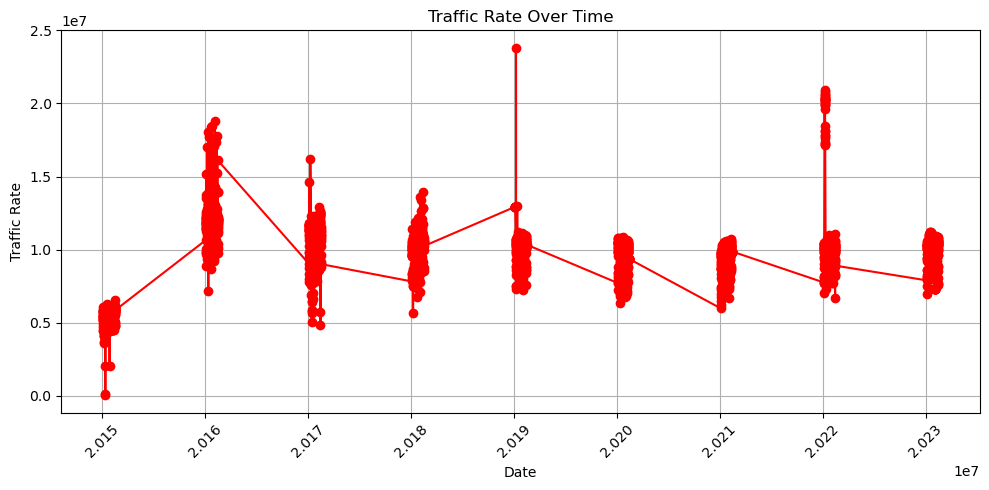

In [56]:
# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(grouped_traffic["Date"], grouped_traffic["Traffic rate"], marker='o', color='red')
plt.title('Traffic Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
# 아웃라이어 존재 중
